In [1]:
import os
import re
import numpy as np
import pandas as pd

df = pd.DataFrame(columns=['predominant', 'genre', 'drum'])

path = 'IRMAS-TrainingData'

dirs = os.scandir(path)
for dir in dirs:
    if os.path.isfile(dir.path):
        continue
    
    pieces = os.scandir(dir.path)
    
    for p in pieces:
        fp = p.path
        name = p.name
        name = name.replace('.wav', '')
        
        m = re.search(r'(\[([a-zA-Z_]+)\])+', name)
        
        labels = m.group()[1:-1].split('][')
        
        predominant = labels[0]
        genre = labels[-1]

        drum = None
        
        if len(labels) > 2:
            drum = labels[1]
            
        df = df.append({'file':fp, 'predominant':predominant, 'genre':genre, 'drum':drum}, ignore_index=True)

df

,predominant,genre,drum,file
0,cel,cla,nod,IRMAS-TrainingData/cel/008__[cel][nod][cla]005...
1,cel,cla,nod,IRMAS-TrainingData/cel/008__[cel][nod][cla]005...
2,cel,cla,nod,IRMAS-TrainingData/cel/008__[cel][nod][cla]005...
3,cel,cla,nod,IRMAS-TrainingData/cel/012__[cel][nod][cla]004...
4,cel,cla,nod,IRMAS-TrainingData/cel/012__[cel][nod][cla]004...
...,...,...,...,...
6700,voi,pop_roc,None,IRMAS-TrainingData/voi/[voi][pop_roc]2547__2.wav
6701,voi,pop_roc,None,IRMAS-TrainingData/voi/[voi][pop_roc]2547__3.wav
6702,voi,pop_roc,None,IRMAS-TrainingData/voi/[voi][pop_roc]2548__1.wav
6703,voi,pop_roc,None,IRMAS-TrainingData/voi/[voi][pop_roc]2548__2.wav


<AxesSubplot:>

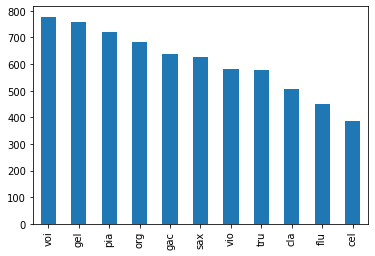

In [49]:
df.predominant.value_counts().plot.bar()

<AxesSubplot:>

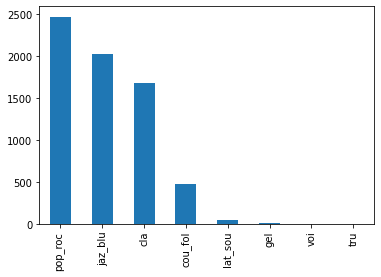

In [50]:
df.genre.value_counts().plot.bar()

<AxesSubplot:>

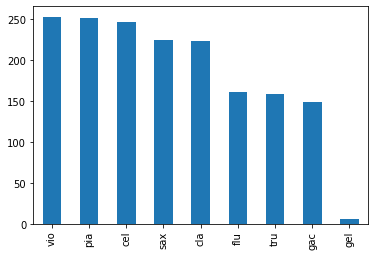

In [53]:
df[df.genre=='cla'].predominant.value_counts().plot.bar()

In [54]:
df.genre.value_counts()

pop_roc    2470
jaz_blu    2027
cla        1675
cou_fol     479
lat_sou      42
gel           6
voi           3
tru           3
Name: genre, dtype: int64

In [636]:
model.fit(
    x=train_X_list, 
    y=train_y_list, 
    batch_size=128, epochs=17, validation_data=(test_X_list, test_y_list))

/home/mathiasplans/.local/lib/python3.6/site-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/17
11/11 [==============================] - 2s 163ms/step - loss: 1.3141 - acc: 0.9730 - val_loss: 1.9003 - val_acc: 0.3623
Epoch 2/17
11/11 [==============================] - 2s 176ms/step - loss: 1.2940 - acc: 0.9858 - val_loss: 1.9268 - val_acc: 0.3293
Epoch 3/17
11/11 [==============================] - 2s 149ms/step - loss: 1.2927 - acc: 0.9858 - val_loss: 1.8777 - val_acc: 0.3952
Epoch 4/17
11/11 [==============================] - 2s 153ms/step - loss: 1.2954 - acc: 0.9858 - val_loss: 1.9554 - val_acc: 0.3114
Epoch 5/17
11/11 [==============================] - 2s 169ms/step - loss: 1.2902 - acc: 0.9873 - val_loss: 1.8758 - val_acc: 0.3892
Epoch 6/17
11/11 [==============================] - 3s 228ms/step - loss: 1.2886 - acc: 0.9880 - val_loss: 1.9050 - val_acc: 0.3533
Epoch 7/17
11/11 [==============================] - 2s 155ms/step - loss: 1.2883 - acc: 0.9880 - val_loss: 1.8981 - val_acc: 0.3563
Epoch 8/17
11/11 [==============================] - 2s 157ms/step - loss: 1.

In [644]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(model.predict(test_X_list), axis=1)
y_actual = np.argmax(test_y_list, axis=1)
cm = confusion_matrix(y_actual, y_pred)

/home/mathiasplans/.local/lib/python3.6/site-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


<AxesSubplot:>

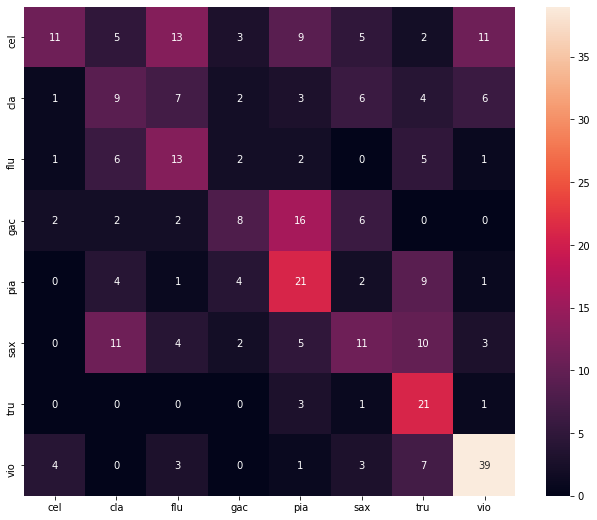

In [654]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, index = [i for i in ['cel', 'cla', 'flu', 'gac', 'pia', 'sax', 'tru', 'vio']],
                  columns = [i for i in ['cel', 'cla', 'flu', 'gac', 'pia', 'sax', 'tru', 'vio']])
plt.figure(figsize = (11,9))
sn.heatmap(df_cm, annot=True)